# Comparing Graph Packages in Julia

## Preliminaries
The version of Julia used to make this notebook was Julia 0.6.2:

In [1]:
VERSION

v"0.6.2"

The packages used in this notebook are LightGraphs and TikzGraphs (to visualize the graphs). To get TikzGraphs working I also needed to install pdf2svg (I used homebrew to install it: `$ brew install pdf2svg`)

In [2]:
using LightGraphs
using TikzGraphs

## Creating a graph from scratch

We can start by creating a graph from scratch:

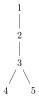

In [3]:
# create graph with 5 nodes and 0 edges
g = Graph(5)

# add three edges
add_edge!(g,1,2)
add_edge!(g,4,3)
add_edge!(g,3,5)
add_edge!(g,3,2)

# plot graph
TikzGraphs.plot(g)

LightGraphs also supports directed graphs. Let's see how the graph we have defined above changes when we make it a directed graph instead:

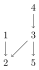

In [4]:
# create directed graph with 5 nodes and 0 edges
dg = DiGraph(5)

# add three edges
add_edge!(dg,1,2)
add_edge!(dg,4,3)
add_edge!(dg,3,5)
add_edge!(dg,3,2)

# plot graph
TikzGraphs.plot(dg)

## Simple methods on graphs

We can find out various pieces of information about our graph, such as whether it's connected, the number of vertices, number of edges, etc:

In [27]:
# returns true if the graph has one component
print("graph connected: ")
println(is_connected(g))

# returns true if there is a path from every vertex to every
# other vertex (obeying directions of edges)
print("digraph strongly connected: ")
println(is_strongly_connected(dg))

# returns true if the undirected version is connected
print("digraph weakly connected: ")
println(is_weakly_connected(dg))
#print(is_connected(dg))

# find number of edges
print("number of edges: ")
println(ne(g))

# find number of vertices
print("number of vertices: ")
println(nv(g))

# find the maximum degree
print("max degree: ")
println(Δ(g))

# find the minimum degree
print("min degree: ")
println(δ(g))

# get the adjacency matrix
print("adjacency matrix: ")
println(adjacency_matrix(g))

graph connected: true
digraph strongly connected: false
digraph weakly connected: true
number of edges: 4
number of vertices: 5
max degree: 3
min degree: 1
adjacency matrix: 
  [2, 1]  =  1
  [1, 2]  =  1
  [3, 2]  =  1
  [2, 3]  =  1
  [4, 3]  =  1
  [5, 3]  =  1
  [3, 4]  =  1
  [3, 5]  =  1


## Graph generators

If you don't feel like building graphs from scratch, it may be useful to use some of the specialized graph constructors:

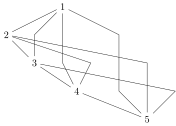

In [17]:
# create a complete graph with 5 vertices
c = CompleteGraph(5)
TikzGraphs.plot(c)

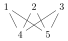

In [18]:
# create a complete bipartite graph with 3 vertices in one partition,
# 2 in the other
cb = CompleteBipartiteGraph(3,2)
TikzGraphs.plot(cb)

In [19]:
# create a path graph of length 5
p = PathGraph(5)
TikzGraphs.plot(p)

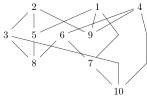

In [34]:
# create a graph with 8 nodes, each of which has degree 3
rr = random_regular_graph(10, 3)
TikzGraphs.plot(rr)

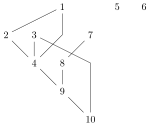

In [35]:
# create a graph with 10 nodes; the probability of each potential
# edge existing is 0.2
er = erdos_renyi(10, 0.2)
TikzGraphs.plot(er)

## Comparing densities
We can end by comparing the densities (number actual edges over number of possible edges) of all of the special graph types we have created.

In [36]:
print("density of complete: ")
println(density(c))
print("density of complete bipartite: ")
println(density(cb))
print("density of path: ")
println(density(p))
print("density of random regular graph: ")
println(density(rr))
print("density of Erdos-Renyi: ")
println(density(er))

density of complete: 1.0
density of complete bipartite: 0.6
density of path: 0.4
density of random regular graph: 0.3333333333333333
density of Erdos-Renyi: 0.2
